In [454]:
import pandas as pd
import numpy as np

#Loading Dataset
cars = pd.read_csv('scout_ErsteDaten.csv', error_bad_lines=False, delimiter=';')
car_manufacturers = pd.read_csv('CarManufacturers.csv', error_bad_lines=False, delimiter=';')

In [455]:
#Generating year and month
cars["month"] = cars["data"].str.split('.').str[0]
cars["year"] = cars["data"].str.split('.').str[1]
cars.head()

,data,km,model,price,month,year
0,11.202,4'500 km,HONDA CR-V 2.0i MMD Hybrid Elegance 4WD Automatic,CHF 36'900.–,11,202
1,12.2013,153'200 km,MERCEDES-BENZ E 250 7G-Tronic,CHF 19'800.–,12,2013
2,3.202,6'900 km,BMW X3 M40d Individual Aut. 4x4 (CH),CHF 78'900.–,3,202
3,Neu,12 km,SUZUKI Swace 1.8 Hybrid Compact+,CHF 31'300.–,Neu,NaN
4,Neu,12 km,SUZUKI Ignis 1.2i Piz Sulai Top Hybrid 4x4,CHF 22'400.–,Neu,NaN


In [456]:
#Correcting year and month
cars["year"].unique()
cars["year"][cars["year"]=='191']='1910'
cars["year"][cars["year"]=='192']='1920'
cars["year"][cars["year"]=='193']='1930'
cars["year"][cars["year"]=='194']='1940'
cars["year"][cars["year"]=='195']='1950'
cars["year"][cars["year"]=='196']='1960'
cars["year"][cars["year"]=='197']='1970'
cars["year"][cars["year"]=='198']='1980'
cars["year"][cars["year"]=='199']='1990'
cars["year"][cars["year"]=='200']='2000'
cars["year"][cars["year"]=='201']='2010'
cars["year"][cars["year"]=='202']='2020'
cars["year"][cars["year"].isna()]='2021'
cars["month"][cars["month"]=="Neu"]='2'
cars["year"]=pd.to_numeric(cars["year"])

In [457]:
#Correcting km
cars["km"]=cars["km"].str.rstrip(' km')
cars['km'] = [float(val.replace("'","").strip()) for val in cars['km']]

In [458]:
#Correcting price
cars["price"]=cars["price"].str.lstrip('CHF ')
cars["price"]=cars["price"].str.rstrip('.–')
cars['price'] = pd.to_numeric(cars['price'].str.replace("'",''))

In [459]:
#Correcting model
cars["model2"]=cars["model"].str.lower()

In [347]:
# Generating brand:
cars["brand"] = cars["model2"].str.split(' ', 1).str.get(0)
cars.head()
cars["brand"][cars["brand"]=="aston"]="aston martin"
cars["brand"][cars["brand"]=="alfa"]="alfa romeo"
cars["brand"][cars["brand"]=="vw"]="volkswagen"
cars["brand"][cars["brand"]=="land"]="land rover"
cars["brand"][cars["brand"]=="austin"]="austin-healey"
cars["brand"][cars["brand"]=="triumph"]="standard-triumph"
cars["brand"][cars["brand"]=="amc"]="amc / eagle"
cars["brand"][cars["brand"]=="ds"]="ds automobiles"
cars["brand"][cars["brand"]=="bmw-alpina"]="bmw"




<ipython-input-347-2f47fc9e08dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["brand"][cars["brand"]=="aston"]="aston martin"
<ipython-input-347-2f47fc9e08dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["brand"][cars["brand"]=="alfa"]="alfa romeo"
<ipython-input-347-2f47fc9e08dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["brand"][cars["brand"]=="vw"]="volkswagen"
<ipython-input-347-2f47fc9e08dc>:7: Settin

In [348]:
# Generatee lowercase letters for brands
car_manufacturers["brand"]=car_manufacturers["brand"].str.lower()

In [349]:
# Merge car dataset with manufacturer dataset
cars_merged = pd.merge(cars, car_manufacturers, how="left", on=["brand"])
cars_na = cars_merged[cars_merged["country"].isna()]
cars_na["brand"].unique()
cars_na.to_csv(r'cars_na.csv', index = False, header=True)
# Around 400 cars do not have a brand 

In [357]:
# Generate uppercase letters for brands
cars_merged["brand"]=cars_merged["brand"].str.upper()

(147786, 8)


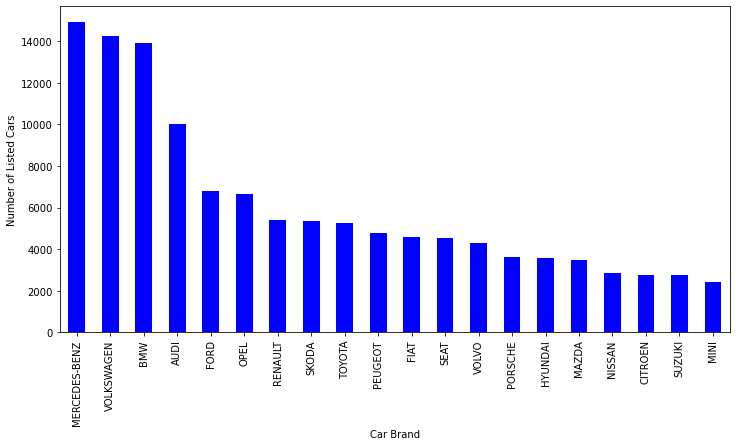

In [359]:
# Generate plot with listed cars by brand
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
cars_merged.groupby('brand')['brand'].count().sort_values(ascending=False).head(20).plot.bar(color='b')
plt.ylabel('Number of Listed Cars')
plt.xlabel('Car Brand')
print(cars.shape)

Text(0.5, 0, 'Country of Car Manufacturer')

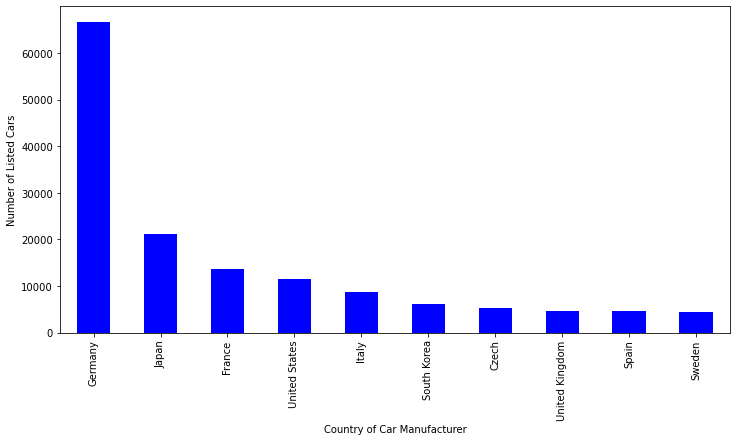

In [448]:
# Generate plot with listed cars by country of manufacturer
plt.figure(figsize=(12,6))
cars_merged.groupby('country')['country'].count().sort_values(ascending=False).head(10).plot.bar(color='b')
plt.ylabel('Number of Listed Cars')
plt.xlabel('Country of Car Manufacturer')

Text(0.5, 0, 'Car Brand')

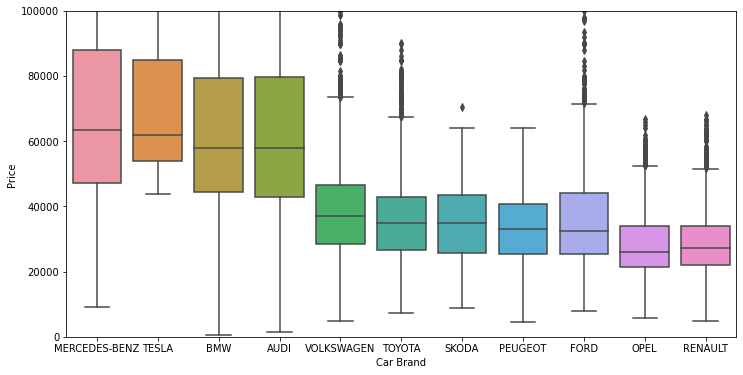

In [452]:
# Generate boxplot with price range of different car manufacturer
cars_brands = cars_merged[(cars_merged["brand"]=="VOLKSWAGEN") | 
                             (cars_merged["brand"]=="MERCEDES-BENZ")| 
                             (cars_merged["brand"]=="AUDI")| 
                             (cars_merged["brand"]=="BMW")| 
                             (cars_merged["brand"]=="FORD")| 
                             (cars_merged["brand"]=="OPEL")| 
                             (cars_merged["brand"]=="RENAULT")| 
                             (cars_merged["brand"]=="SKODA")| 
                             (cars_merged["brand"]=="TOYOTA")| 
                             (cars_merged["brand"]=="PEUGEOT")| 
                             (cars_merged["brand"]=="TESLA")  
                         ]
cars_brands = cars_brands[cars_brands["year"]>2017]
plt.figure(figsize=(12,6))
g = sns.boxplot(x='brand', y='price', data=cars_brands, order=["MERCEDES-BENZ", "TESLA", "BMW", "AUDI",  "VOLKSWAGEN", "TOYOTA"
                                                              , "SKODA", "PEUGEOT", "FORD", "OPEL", "RENAULT"])
g.set(ylim=(0, 100000))
plt.ylabel('Price')
plt.xlabel('Car Brand')



Text(0.5, 0, 'Car Model')

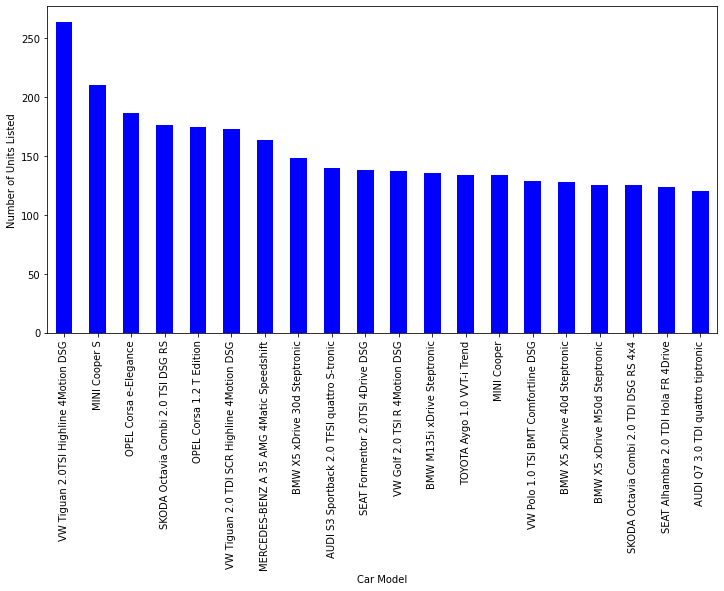

In [366]:
# Generate plot with listed cars by model
plt.figure(figsize=(12,6))
cars_merged.groupby('model')['model'].count().sort_values(ascending=False).head(20).plot.bar(color='b')
plt.ylabel('Number of Units Listed')
plt.xlabel('Car Model')

/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


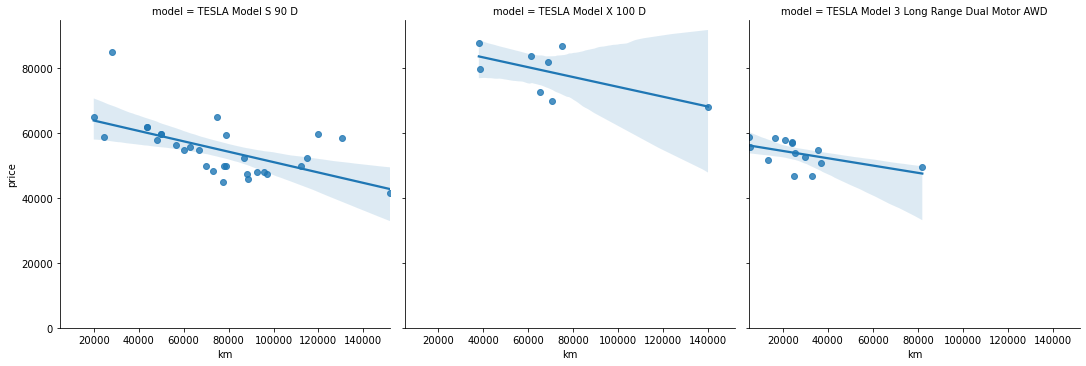

In [439]:
# Generate plot with relation of price to km (TESLA)
cars_tesla = cars[(cars["model"]=="TESLA Model S 90 D") | 
                             (cars["model"]=="TESLA Model 3 Long Range Dual Motor AWD") |
                             (cars["model"]=="TESLA Model X 100 D") 
                            ]
g = sns.lmplot("km", "price", cars_tesla, col="model")
g.set(ylim=(0, None))

In [400]:
from sklearn.linear_model import LinearRegression

x = cars_tesla["km"].values
y = cars_tesla["price"].values


length = cars_tesla.shape[0] 

x = x.reshape(length, 1)
y = y.reshape(length, 1)
                 
reg = LinearRegression().fit(x,y)
reg

LinearRegression()

/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


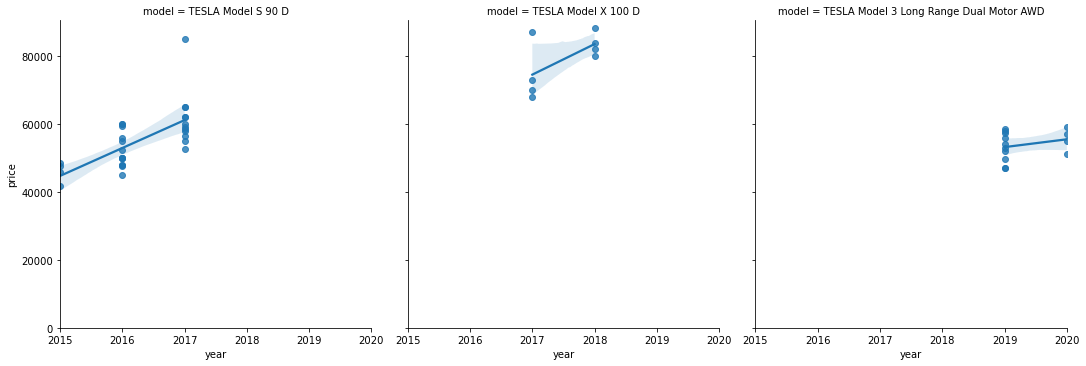

In [440]:
# Generate plot with relation of price to age (TESLA)
g = sns.lmplot("year", "price", cars_tesla, col="model")
g.set(ylim=(0, None))

/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


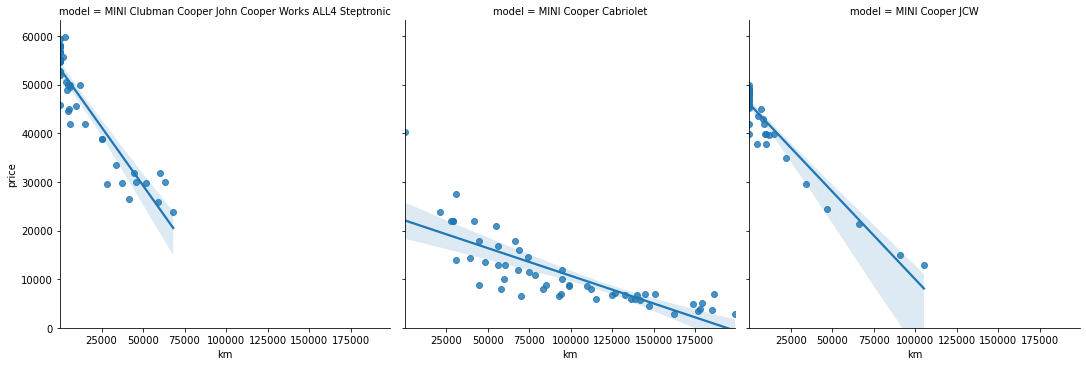

In [441]:
# Generate plot with relation of price to km (MINI)
cars_mini = cars[(cars["model"]=="MINI Clubman Cooper John Cooper Works ALL4 Steptronic") | 
                             (cars["model"]=="MINI Cooper Cabriolet") |
                             (cars["model"]=="MINI Cooper JCW") 
                            ]
g = sns.lmplot("km", "price", cars_mini, col="model")
g.set(ylim=(0, None))



/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


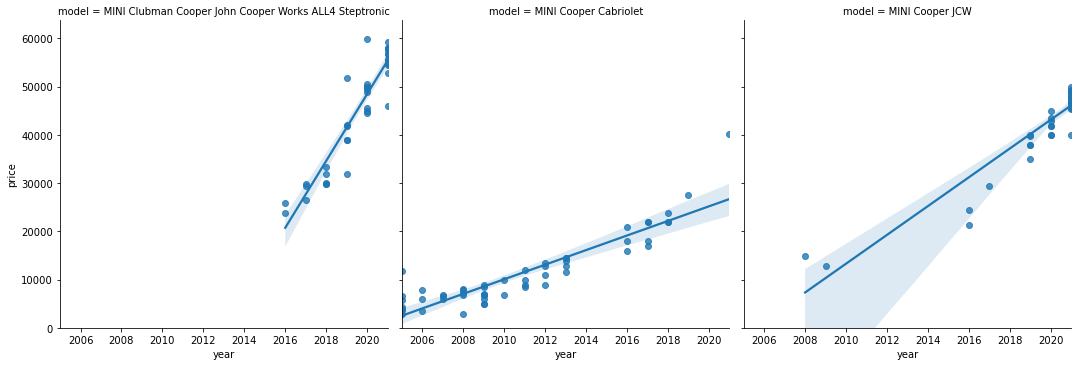

In [442]:
# Generate plot with relation of price to age (MINI)
g = sns.lmplot("year", "price", cars_mini, col="model")
g.set(ylim=(0, None))

/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


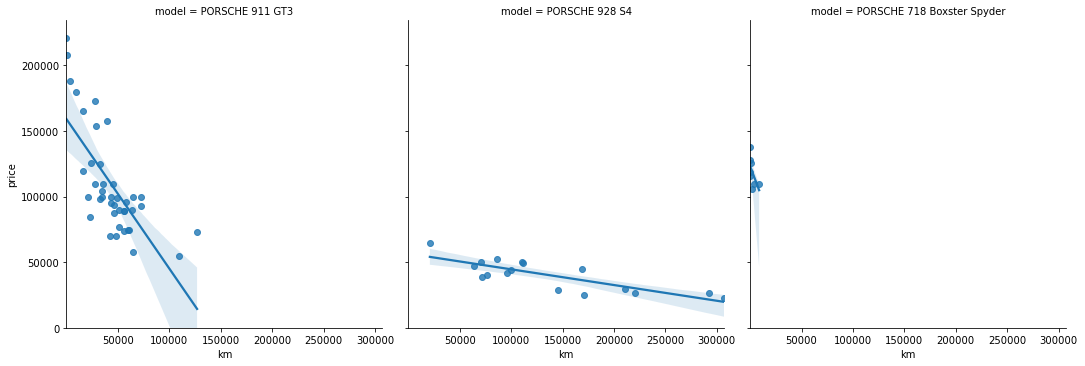

In [443]:
# Generate plot with relation of price to km (PORSCHE)
cars_porsche = cars[(cars["model"]=="PORSCHE 718 Boxster Spyder") | 
                             (cars["model"]=="PORSCHE 911 GT3") |
                             (cars["model"]=="PORSCHE 928 S4")] 
                 

g = sns.lmplot("km", "price", cars_porsche, col="model")
g.set(ylim=(0, None))
